## POWER HOUSE
scikit-learn

In [3]:
# pip install scikit-learn

## Classification
Classifying (examples)



1. Linear  `y = mx + c`
2. Non linear `quadratic` `x2 + 5x + c = number`

The person will default on a loan or not ( age, gender, account balance)

####  Linear Models
1. Lasso
2. Elastic-Net
3. Logistic regression

### Stochastic Gradient Descent
4. Stochastic Gradient Descent - SGD

5. Support Vector Machines 
### Nearest Neighbors
6. Nearest Neighbors (KNN)
7. Naive Bayes
## Trees
8. Decision Trees ( decision and random forest)

## Ensemble  : 
combine tree models and mean of the total prediction 

## Neural network models (supervised)

##  Multiclass and multioutput algorithms

example : Classify the cutomer will be subscribe savings, current,dom, investment,

if we have 30 retail products ( 0.65, 0.45, 0.95, 0.01)


0 or 1
100% 
35% and 65%


### Feature selection ( prepping data)

### Performance metrics
‘roc_auc’,‘accuracy’,‘precision’,‘recall’ 
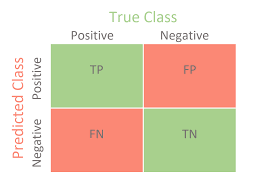

loan defaulters

- TP ( 900, WILL COLLECT LOAN AND PAY BACK)
- FP ( 400 WILL COLLECT LOAN AND PAYBACK) ( When you checked your training data it was false)
- FN ( 700 YOU SAID THAT WILL NOT PAYBACK) but in reality they actually paid back
- TN ( 500 the customers will not pay the loan , don't give them) when you get access to the customer credit score , you will see that they actually don't pay back their loans.



precision = TruePositives / (TruePositives + FalsePositives)
Recall = TruePositives / (TruePositives + FalseNegatives)
accuracy (TP + TN) /( TP + TN + FalseNegatives + FalsePositives)

In [5]:
print(900/(900 + 400) * 100)
print(1000/(1000 + 200)* 100)
print((900+ 500)/(900+ 500+ 900+400)* 100)

69.23076923076923
83.33333333333334
51.85185185185185


In [6]:
print((900+ 500)/(900+ 500+ 100+20)* 100)

92.10526315789474


Supervised : You know your data label ( trying to predict loan, predict houses)

Linear and non linear models
1. Classification 
2. Regression
3. Multilabel classification

Unsupervised : Create a label ( clustering)

Nine clusters ( mean salary, avg spend, dom balance) ( high spenders, low spenders, high class)

### Classification
K-Nearest Neighbors : The KNN algorithm assumes that similar things exist in close proximity (neighbours)
Support Vector Machines
Decision Tree Classifiers/Random Forests
Naive Bayes
Linear Discriminant Analysis
Logistic Regression

In [ ]:
# CREATE A FAKE DATASET 
#Banking 

## PREPROCESSING OUR DATA

In [7]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv("data.csv")

In [9]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## EXPLORATORY DATA ANALYSIS

In [10]:
df.shape

(614, 13)

In [11]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [14]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [20]:
np.log(1000000000000000)


34.538776394910684

In [21]:
np.log(20000)

9.903487552536127

In [ ]:
1. Categorical variable ( transform to numbers [0,1,2] , [0,1,2], [0,1])
2. Numerical variables ( clean it, removes outliers, normalization (logarithm))

## CLEAN VALUES

In [15]:
print(df['Property_Area'].unique())
print(df['Gender'].unique())
print(df['Married'].unique())
print(df['Education'].unique())
print(df['Self_Employed'].unique())
print(df['Loan_Status'].unique())
print(df['Dependents'].unique())

['Urban' 'Rural' 'Semiurban']
['Male' 'Female' nan]
['No' 'Yes' nan]
['Graduate' 'Not Graduate']
['No' 'Yes' nan]
['Y' 'N']
['0' '1' '2' '3+' nan]


In [22]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [23]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [26]:
df.select_dtypes(include=['object']).head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [12]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [24]:
cleanup_nums = {"Property_Area":     {'Urban':0, 'Rural':1, 'Semiurban':2},
                "Gender": {'Male':0, 'Female':1, np.nan :2},
                "Married": {'No':0, 'Yes':1, np.nan :2},
                "Education": {'Graduate':0, 'Not Graduate':1},
                  "Self_Employed": {'No':0, 'Yes':1, np.nan :2},
                "Loan_Status": {'Y':0, 'N':1},
                "Dependents": {'0':0, '1' :1,'2':2, '3+':3, np.nan:4},
                
               }

In [25]:
train = df.copy()

In [26]:
train= train.replace(cleanup_nums)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,0,0,5849,0.0,NaN,360.0,1.0,0,0
1,LP001003,0,1,1,0,0,4583,1508.0,128.0,360.0,1.0,1,1
2,LP001005,0,1,0,0,1,3000,0.0,66.0,360.0,1.0,0,0
3,LP001006,0,1,0,1,0,2583,2358.0,120.0,360.0,1.0,0,0
4,LP001008,0,0,0,0,0,6000,0.0,141.0,360.0,1.0,0,0


In [60]:
df.select_dtypes(include=[np.number]).head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


## CLEAN NUMERICAL VALUES

In [28]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
df.select_dtypes(include=[np.number]).head().columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [29]:
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']
for col in cols :
    train[col] = train[col].fillna(train[col].mean())

In [30]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [32]:
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']
for col in cols :
    train[col] = np.log1p(train[col])

In [33]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,0,0,2.269462,0.000000,1.790631,1.929908,0.526589,0,0
1,LP001003,0,1,1,0,0,2.243931,2.118566,1.768118,1.929908,0.526589,1,1
2,LP001005,0,1,0,0,1,2.197969,0.000000,1.649561,1.929908,0.526589,0,0
3,LP001006,0,1,0,1,0,2.181219,2.170880,1.757132,1.929908,0.526589,0,0
4,LP001008,0,0,0,0,0,2.272093,0.000000,1.784370,1.929908,0.526589,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,0,0,2.194199,0.000000,1.663294,1.929908,0.526589,1,0
610,LP002979,0,1,3,0,0,2.232211,0.000000,1.550446,1.824307,0.526589,1,0
611,LP002983,0,1,1,0,0,2.302213,1.869461,1.877529,1.929908,0.526589,0,0
612,LP002984,0,1,2,0,0,2.295943,0.000000,1.830410,1.929908,0.526589,0,0


In [64]:
# df

In [34]:
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']
for col in cols :
    print(train[col].max())


2.50977947209551
2.454231673932842
2.0218796785726947
1.9707236282233618
0.5265890341390445


In [35]:
train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,2.232101,1.201140,1.766392,1.916476,0.446207
std,0.068922,1.077480,0.086008,0.052286,0.184364
min,1.794635,0.000000,1.194706,1.271150,0.000000
25%,2.193331,0.000000,1.725901,1.929908,0.526589
50%,2.224224,2.089529,1.769435,1.929908,0.526589
75%,2.268503,2.167898,1.810005,1.929908,0.526589
max,2.509779,2.454232,2.021880,1.970724,0.526589


In [67]:
# train.describe()

In [49]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [36]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,0,0,2.269462,0.000000,1.790631,1.929908,0.526589,0,0
1,LP001003,0,1,1,0,0,2.243931,2.118566,1.768118,1.929908,0.526589,1,1
2,LP001005,0,1,0,0,1,2.197969,0.000000,1.649561,1.929908,0.526589,0,0
3,LP001006,0,1,0,1,0,2.181219,2.170880,1.757132,1.929908,0.526589,0,0
4,LP001008,0,0,0,0,0,2.272093,0.000000,1.784370,1.929908,0.526589,0,0


In [37]:
Independent_variables = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']
dependent_variable = 'Loan_Status'

## FEATURE SELECTIONS

In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [39]:
len(df.columns)

13

In [40]:
X = train[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]  #independent columns
y = train['Loan_Status']

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                Specs      Score
9      Credit_History  13.692017
10      Property_Area   4.398854
3           Education   3.540502
6   CoapplicantIncome   2.833045
1             Married   2.047144
0              Gender   0.498961
4       Self_Employed   0.087261
2          Dependents   0.048953
7          LoanAmount   0.004080
5     ApplicantIncome   0.000256


In [42]:
['Credit_History','CoapplicantIncome','Property_Area','Education','Married','Gender']

['Credit_History',
 'CoapplicantIncome',
 'Property_Area',
 'Education',
 'Married',
 'Gender']

## feed on all models

## hyperparameter tuning

After feeding data on model, pick one that performs the most ( metrics )

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

In [47]:
names = [
    "Logistic Regression",
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    LogisticRegression(penalty='l2'),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

In [44]:
from sklearn.model_selection import train_test_split
X = train[['Credit_History','CoapplicantIncome','Property_Area','Education','Married','Gender']]  #independent columns
y = train['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)

In [45]:
X_train.head(3)

,Credit_History,CoapplicantIncome,Property_Area,Education,Married,Gender
244,0.526589,2.240012,2,1,1,0
393,0.526589,2.127503,2,1,1,0
310,0.526589,0.000000,2,0,0,1


In [99]:
X_test.head(1)

,Credit_History,CoapplicantIncome,Property_Area,Education,Married,Gender
350,0.693147,0.0,2,0,1,0


In [48]:
accuracyScores =[]
precisionScores=[]
recallScoreS=[]
roc_aucScoreS=[]


for  name, classifier in zip(names, classifiers):
    model = classifier.fit(X_train, y_train)
    ypred = model.predict(X_test)
    accuracyScore = accuracy_score(y_test,ypred)
    precisionScore = precision_score(y_test,ypred)
    recallScore = recall_score(y_test,ypred)
    roc_aucScore = roc_auc_score(y_test,ypred)
     
    accuracyScores.append(accuracyScore)
    precisionScores.append(precisionScore)
    recallScoreS.append(recallScore)
    roc_aucScoreS.append(roc_aucScore)
    
    
    
    
    


/Users/apple/Desktop/indicina/coding/model-building-project/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
result = pd.DataFrame(
{
    "MODEL_NAME" : names ,
    " accuracyScores": accuracyScores,
    "precisionScores":precisionScores,
    "recallScoreS":recallScoreS,
    "roc_aucScoreS":roc_aucScoreS
})

loan defaulters

- TP ( 900, WILL COLLECT LOAN AND PAY BACK)
- FP ( 400 WILL COLLECT LOAN AND PAYBACK) ( When you checked your training data it was false)
- FN ( 700 YOU SAID THAT WILL NOT PAYBACK) but in reality they actually paid back
- TN ( 500 the customers will not pay the loan , don't give them) when you get access to the customer credit score , you will see that they actually don't pay back their loans.

precision = TruePositives / (TruePositives + FalsePositives)
Recall = TruePositives / (TruePositives + FalseNegatives)
accuracy (TP + TN) /( TP + TN + FalseNegatives + FalsePositives)

In [66]:
def roc_auc_curve(model, trainX,trainy,testX,testy):
    ns_probs = [0 for _ in range(len(testy))]
    from sklearn.metrics import roc_curve
    from sklearn.metrics import roc_auc_score
    from matplotlib import pyplot
    model.fit(trainX, trainy)
    # predict probabilities
    lr_probs = model.predict_proba(testX)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(testy, ns_probs)
    lr_auc = roc_auc_score(testy, lr_probs)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Logistic: ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
    # plot the roc curve for the model
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()

In [51]:
result

,MODEL_NAME,accuracyScores,precisionScores,recallScoreS,roc_aucScoreS
0,Logistic Regression,0.798030,0.942857,0.458333,0.721533
1,Nearest Neighbors,0.729064,0.707317,0.402778,0.655587
2,Linear SVM,0.645320,0.000000,0.000000,0.500000
3,RBF SVM,0.758621,0.848485,0.388889,0.675360
4,Gaussian Process,0.798030,0.942857,0.458333,0.721533
5,Decision Tree,0.783251,0.868421,0.458333,0.710083
6,Random Forest,0.793103,0.941176,0.444444,0.714589
7,Neural Net,0.650246,1.000000,0.013889,0.506944
8,AdaBoost,0.798030,0.942857,0.458333,0.721533
9,Naive Bayes,0.798030,0.942857,0.458333,0.721533


In [104]:
result.sort_values(by =['roc_aucScoreS'], ascending=False)

,MODEL_NAME,accuracyScores,precisionScores,recallScoreS,roc_aucScoreS
0,Logistic Regression,0.798030,0.942857,0.458333,0.721533
4,Gaussian Process,0.798030,0.942857,0.458333,0.721533
6,Random Forest,0.798030,0.942857,0.458333,0.721533
8,AdaBoost,0.798030,0.942857,0.458333,0.721533
9,Naive Bayes,0.798030,0.942857,0.458333,0.721533
10,QDA,0.798030,0.942857,0.458333,0.721533
5,Decision Tree,0.783251,0.868421,0.458333,0.710083
3,RBF SVM,0.753695,0.892857,0.347222,0.662161
1,Nearest Neighbors,0.709360,0.658537,0.375000,0.634065
7,Neural Net,0.660099,1.000000,0.041667,0.520833


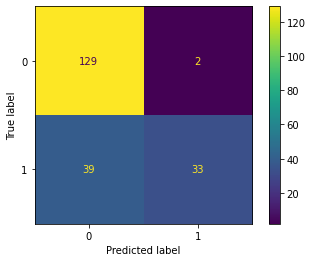

In [59]:
import matplotlib.pyplot as plt

from sklearn.metrics import plot_confusion_matrix
model = LogisticRegression(penalty='l2')
model.fit(X_train, y_train)
plot_confusion_matrix(model, X_test, y_test)  

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.754


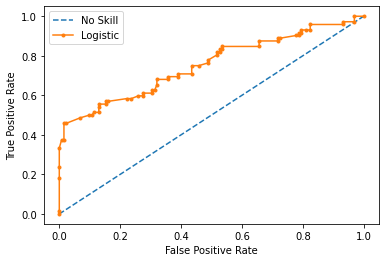

In [67]:
roc_auc_curve(model, X_train,y_train,X_test,y_test)

### 2ND MODEL

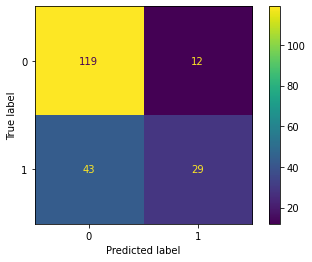

In [68]:
import matplotlib.pyplot as plt

from sklearn.metrics import plot_confusion_matrix
model =KNeighborsClassifier(3)
model.fit(X_train, y_train)
plot_confusion_matrix(model, X_test, y_test)  

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.712


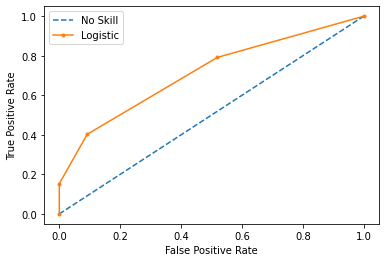

In [69]:
roc_auc_curve(model, X_train,y_train,X_test,y_test)

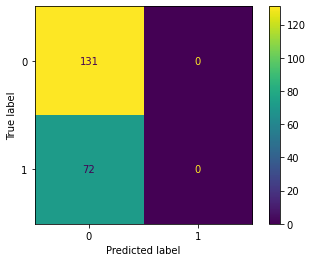

In [70]:
import matplotlib.pyplot as plt

from sklearn.metrics import plot_confusion_matrix
model =SVC(kernel="linear", C=0.025)
model.fit(X_train, y_train)
plot_confusion_matrix(model, X_test, y_test)  

In [72]:
# roc_auc_curve(model, X_train,y_train,X_test,y_test)

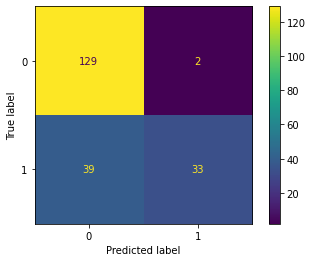

In [73]:
import matplotlib.pyplot as plt

from sklearn.metrics import plot_confusion_matrix
model =GaussianProcessClassifier(1.0 * RBF(1.0))
model.fit(X_train, y_train)
plot_confusion_matrix(model, X_test, y_test)  

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.759


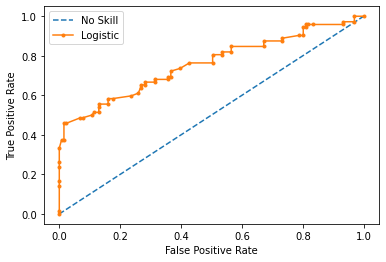

In [74]:
roc_auc_curve(model, X_train,y_train,X_test,y_test)

REGRESSION MODELS (here we are not talking about classification)
- Ridge regression
- Linear regression
- Polynomial regression
- Lasso regression


Mean Squared Error
Root Mean Squared Error
Mean Absolute Error

yi is the observed value.
ŷi is the corresponding predicted value.
n = the number of observations.


MSE = ( yi - ŷi)**2/n
RMSE = squareroot (MSE)
MAE = summation( yi - ŷi)/no of observations




stocks ( MTN, Nestle, Airtel stock)
real_life ( 100, 145, 500)
model predicted (45, 400, 345) (model 1)
model 2( 90, 130, 480)

In [75]:
(100-45)**2 + (145-400)**2 + (500 - 345)**2/3

76058.33333333333

In [77]:
import math 
math.sqrt(76058.33333333333)

275.7867533681292

In [78]:
(100-90)**2 + (145-130)**2 + (500 - 480)**2/3
math.sqrt(275.7867533681292)

16.606828516249852

## Regression

In [105]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,0,0,8.674197,0.000000,4.993232,5.888878,0.693147,0,0
1,LP001003,0,1,1,0,0,8.430327,7.319202,4.859812,5.888878,0.693147,1,1
2,LP001005,0,1,0,0,1,8.006701,0.000000,4.204693,5.888878,0.693147,0,0
3,LP001006,0,1,0,1,0,7.857094,7.765993,4.795791,5.888878,0.693147,0,0
4,LP001008,0,0,0,0,0,8.699681,0.000000,4.955827,5.888878,0.693147,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,0,0,7.972811,0.000000,4.276666,5.888878,0.693147,1,0
610,LP002979,0,1,3,0,0,8.320448,0.000000,3.713572,5.198497,0.693147,1,0
611,LP002983,0,1,1,0,0,8.996280,5.484797,5.537334,5.888878,0.693147,0,0
612,LP002984,0,1,2,0,0,8.933796,0.000000,5.236442,5.888878,0.693147,0,0


In [79]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,0,0,2.269462,0.000000,1.790631,1.929908,0.526589,0,0
1,LP001003,0,1,1,0,0,2.243931,2.118566,1.768118,1.929908,0.526589,1,1
2,LP001005,0,1,0,0,1,2.197969,0.000000,1.649561,1.929908,0.526589,0,0
3,LP001006,0,1,0,1,0,2.181219,2.170880,1.757132,1.929908,0.526589,0,0
4,LP001008,0,0,0,0,0,2.272093,0.000000,1.784370,1.929908,0.526589,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,0,0,2.194199,0.000000,1.663294,1.929908,0.526589,1,0
610,LP002979,0,1,3,0,0,2.232211,0.000000,1.550446,1.824307,0.526589,1,0
611,LP002983,0,1,1,0,0,2.302213,1.869461,1.877529,1.929908,0.526589,0,0
612,LP002984,0,1,2,0,0,2.295943,0.000000,1.830410,1.929908,0.526589,0,0


In [80]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

X = train[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome','Loan_Status',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]  #independent columns
y = train['LoanAmount']

def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

Feature 0: 1.016750
Feature 1: 17.320735
Feature 2: 12.376072
Feature 3: 7.763280
Feature 4: 4.868938
Feature 5: 101.448198
Feature 6: 5.963382
Feature 7: 0.016864
Feature 8: 4.673693
Feature 9: 1.745239
Feature 10: 2.367791


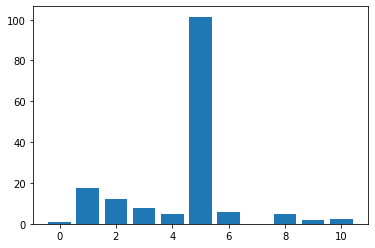

In [81]:
from matplotlib import pyplot

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [82]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


### linear

In [83]:
X = train[['Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome']].values


In [84]:
X

array([[0.        , 0.        , 0.        , 0.        , 2.26946223,
        0.        ],
       [1.        , 1.        , 0.        , 0.        , 2.2439308 ,
        2.11856639],
       [1.        , 0.        , 0.        , 1.        , 2.19796884,
        0.        ],
       ...,
       [1.        , 1.        , 0.        , 0.        , 2.30221307,
        1.8694605 ],
       [1.        , 2.        , 0.        , 0.        , 2.29594269,
        0.        ],
       [0.        , 0.        , 0.        , 1.        , 2.2439308 ,
        0.        ]])

In [86]:
Y = train['LoanAmount'].values
Y

array([1.79063091, 1.76811759, 1.64956065, 1.75713189, 1.78437008,
       1.88570311, 1.71637985, 1.80317806, 1.81317823, 1.92540611,
       1.66064038, 1.74055045, 1.84107408, 1.7483181 , 1.35850472,
       1.76409393, 1.72546305, 1.67593802, 1.77458615, 1.74982404,
       1.73235625, 1.91039284, 1.75131482, 1.74525955, 1.79573166,
       1.83378   , 1.75995646, 1.74213674, 1.52246703, 1.75713189,
       1.84186111, 1.67100103, 1.73568791, 1.7483181 , 1.91271393,
       1.79063091, 1.72546305, 1.78787422, 1.82782711, 1.74213674,
       1.68537049, 1.58334052, 1.67348882, 1.77584598, 1.71824047,
       1.70267984, 1.57000297, 1.78787422, 1.75713189, 1.78787422,
       1.72546305, 1.75713189, 1.74525955, 1.77584598, 1.89604174,
       1.72007861, 1.71824047, 1.77709495, 1.82430685, 1.78787422,
       1.75713189, 1.72368942, 1.81025205, 1.79063091, 1.75131482,
       1.88050696, 1.76544751, 1.90897986, 1.76409393, 1.77833323,
       1.81698716, 1.72007861, 1.68764249, 1.71637985, 1.83040

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [102]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [103]:
y_pred = regressor.predict(X_test)
COMPARE = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
COMPARE

,Actual,Predicted
0,1.694266,1.767329
1,1.745260,1.725093
2,1.914541,1.816887
3,1.742137,1.791813
4,1.720079,1.771646
...,...,...
118,1.820695,1.776804
119,1.770740,1.864486
120,1.957264,1.817177
121,1.660640,1.774124


In [104]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.04784888192542166
Mean Squared Error: 0.004275244810843327
Root Mean Squared Error: 0.06538535624161824


In [108]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.scatter(X_train,y_train,color='red')
# plt.plot(x_train,regressor.predict(X_test),color='blue')
# plt.title('Truth or bluff(Linear Regression)')
# plt.xlabel('Position Level')
# plt.ylabel('Salary')
# plt.show()

## RIDGE

In [94]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.04947748984402544
Mean Squared Error: 0.004623279612181448
Root Mean Squared Error: 0.06799470282442191


## lasso

In [96]:
from sklearn import linear_model
lasso= linear_model.Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.055661032530882
Mean Squared Error: 0.006077424869406157
Root Mean Squared Error: 0.07795784033313236


### Polynomial

In [110]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4)
X_poly=poly_reg.fit_transform(X_test)
poly_reg.fit(X_poly,y_test)
lin_reg2=LinearRegression()
lin_reg2.fit(X_poly,y_test)
y_pred = lasso.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

LinearRegression()